# Dataset Introduction

The dataset comprises several essential columns, each providing crucial insights into the factors influencing salaries within the data science domain. These columns include:

-  '**Job Title**' describing the role of the employee

-  '**Employment Type**' denoting the nature of their employment

-  '**Experience Level**' and '**Expertise Level**' reflecting the candidate's proficiency and knowledge

-  '**Salary**' and '**Salary Currency**' representing the remuneration and its currency denomination

-  '**Company Location**' identifying the geographical setting of the employer

-  '**Salary in USD**' converting the salaries into a consistent currency for comparison

-  '**Employee Residence**' detailing the residence location

-  '**Company Size**' indicating the company's scale

-  '**Year**' the year of the recorded data

In this notebook my goal is to explore and visualize trends within the different data science/analyst professions.

This dataset was found on kaggle: https://www.kaggle.com/datasets/iamsouravbanerjee/data-science-salaries-2023

Author: Maxwell Wind - 2023

# Data Loading and Inspection

-  in this section I will load the dataset into a pandas DataFrame

-  Inspect the first few rows of the dataset to understand the structure and identify any potential issues 

-  Check data types, missing values, basic statistics


- *note that the usability score of this dataset on kaggle was a 10/10 meaning that there will not be substantial data preprocessing and data cleaning necessary*

In [52]:
# Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#loading data into a pandas dataframe
file_path = '/Users/maxwind/Desktop/Data Projects/Portfolio Projects/Data Salaries Project/Latest_Data_Science_Salaries.csv'
df = pd.read_csv(file_path)

#### Inspecting the Data

In [53]:
#Display the first few rows of the DataFrame to get an overview of the data
print(df.head())
#Check the dimensions of the DataFrame (rows and columns)
print("Data dimensions:", df.shape)

        Job Title Employment Type Experience Level Expertise Level  Salary  \
0   Data Engineer       Full-Time           Senior          Expert  210000   
1   Data Engineer       Full-Time           Senior          Expert  165000   
2   Data Engineer       Full-Time           Senior          Expert  185900   
3   Data Engineer       Full-Time           Senior          Expert  129300   
4  Data Scientist       Full-Time           Senior          Expert  140000   

        Salary Currency Company Location  Salary in USD Employee Residence  \
0  United States Dollar    United States         210000      United States   
1  United States Dollar    United States         165000      United States   
2  United States Dollar    United States         185900      United States   
3  United States Dollar    United States         129300      United States   
4  United States Dollar    United States         140000      United States   

  Company Size  Year  
0       Medium  2023  
1       Medium  

In [54]:
#overview of the data types and the number of non-null values in each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3300 non-null   object
 1   Employment Type     3300 non-null   object
 2   Experience Level    3300 non-null   object
 3   Expertise Level     3300 non-null   object
 4   Salary              3300 non-null   int64 
 5   Salary Currency     3300 non-null   object
 6   Company Location    3300 non-null   object
 7   Salary in USD       3300 non-null   int64 
 8   Employee Residence  3300 non-null   object
 9   Company Size        3300 non-null   object
 10  Year                3300 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 283.7+ KB
None


In [55]:
#Check for any missing values in the dataset
print("Missing values:\n", df.isnull().sum())

Missing values:
 Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64


In [56]:
#looking at the basic statistics of the numerical columns
print("Basic statistics:\n", df.describe().apply(lambda x: x.apply('{0:.5f}'.format)))

Basic statistics:
                Salary Salary in USD        Year
count      3300.00000    3300.00000  3300.00000
mean     204662.29212  142095.98394  2022.49545
std      727938.29452   69028.23551     0.71636
min       14000.00000   15000.00000  2020.00000
25%       94169.00000   90000.00000  2022.00000
50%      140000.00000  136000.00000  2023.00000
75%      190000.00000  185000.00000  2023.00000
max    30400000.00000  450000.00000  2023.00000


In [57]:
#Inspecting unique values in categorical columns to understand their categories
print("Unique values in 'Job Title':\n", df['Job Title'].unique(), "\n")
print("Unique values in 'Employment Type':\n", df['Employment Type'].unique(), "\n")
print("Unique values in 'Experience Level':\n", df['Experience Level'].unique(), "\n")
print("Unique values in 'Company Location':\n", df['Company Location'].unique(), "\n")
print("Unique values in 'Salary Currency':\n", df['Salary Currency'].unique(), "\n")

Unique values in 'Job Title':
 ['Data Engineer' 'Data Scientist' 'Analytics Engineer'
 'Business Intelligence Developer' 'Machine Learning Engineer'
 'Data Analyst' 'Decision Scientist' 'Machine Learning Software Engineer'
 'BI Developer' 'Machine Learning Scientist' 'BI Analyst' 'Data Manager'
 'Business Intelligence Engineer' 'ML Engineer' 'Data Science Manager'
 'AI Programmer' 'Applied Scientist' 'Data Analytics Manager'
 'Research Engineer' 'Research Scientist' 'Data Lead' 'Data Strategist'
 'Data Quality Analyst' 'Data Architect' 'AI Architect'
 'Computer Vision Engineer' 'Business Intelligence Analyst'
 'Principal Data Scientist' 'Staff Machine Learning Engineer'
 'Staff Data Scientist' 'Consultant Data Engineer'
 'Machine Learning Specialist' 'Head of Data' 'Data Quality Engineer'
 'Research Analyst' 'Principal Machine Learning Engineer'
 'Deep Learning Engineer' 'Data Visualization Specialist' 'MLOps Engineer'
 'Business Intelligence Data Analyst' 'Data Science Engineer'
 'Dat

In [58]:
#checking for duplicate values within the dataset
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


In [59]:
#verifying data types of each column
print("Data types:\n", df.dtypes)

Data types:
 Job Title             object
Employment Type       object
Experience Level      object
Expertise Level       object
Salary                 int64
Salary Currency       object
Company Location      object
Salary in USD          int64
Employee Residence    object
Company Size          object
Year                   int64
dtype: object


# Data Cleaning

- As stated in section 2, this dataset has a Kaggle usability score of 10/10 meaning minimal data cleaning is necessary.

- All I will be doing in this section is converting the 'Year' column to datetime formatting

In [60]:
# 'Year' to datetime:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Data Exploration

In this section I will creating several tables and calculated columns that group data and help further analyze the dataset

- **Table 1** Job Titles and Salary Statistics
- **Table 2** Salary Trends over the Years
- **Table 3** Salary Trends by Country

#### Job Titles and Salary Statistics Table

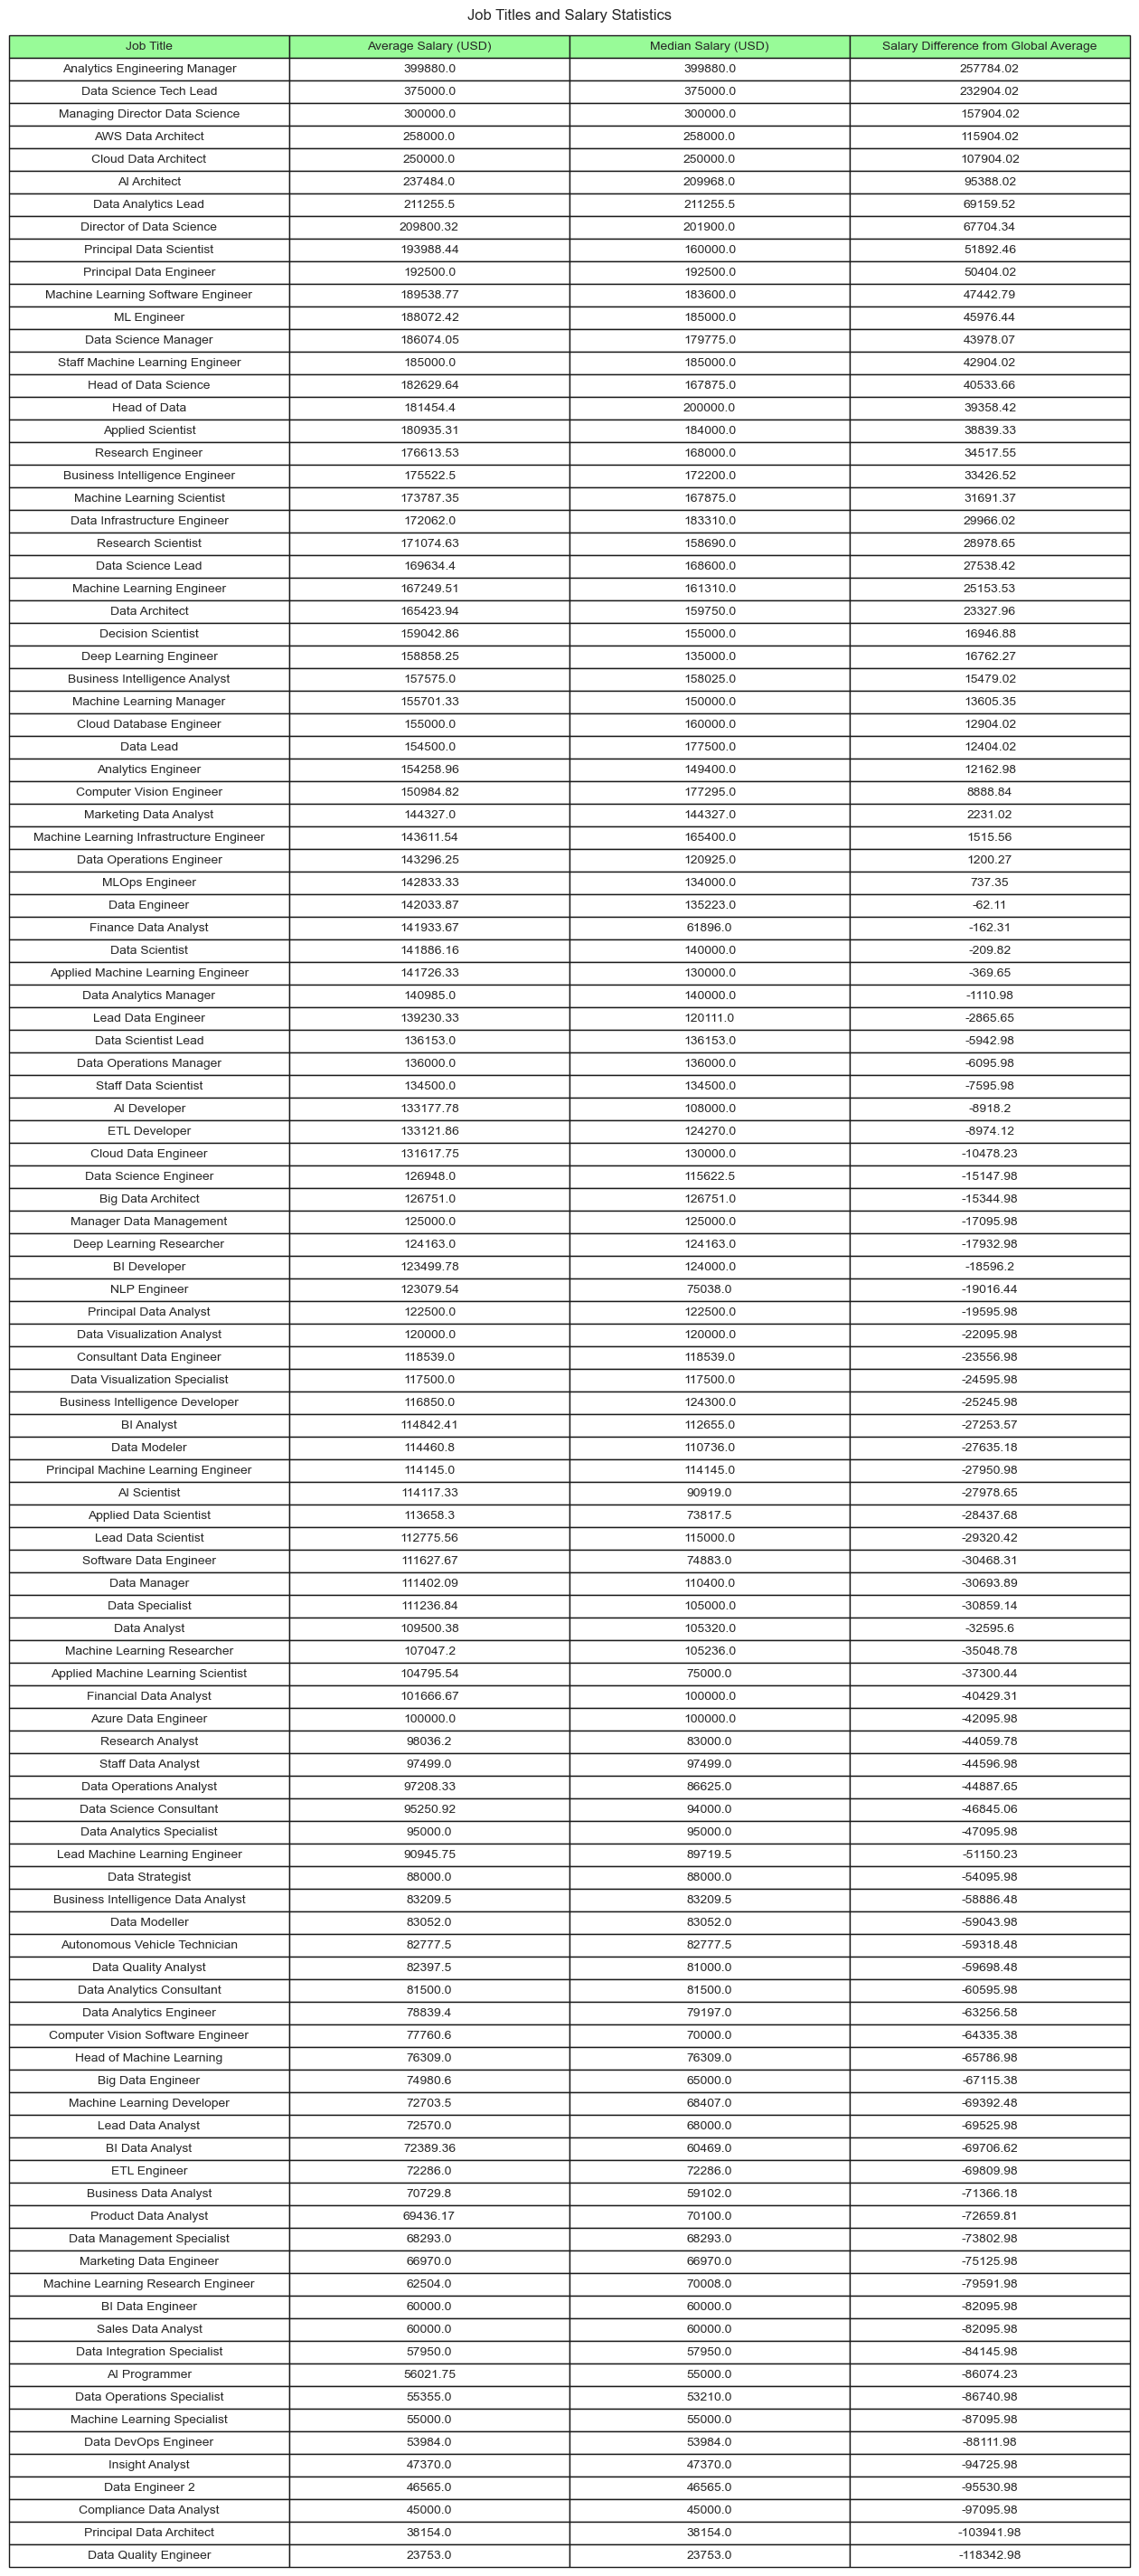

In [61]:
# Calculate global average salary
global_average_salary = df['Salary in USD'].mean()

# Calculate average salary for each job title and round to two decimal places
average_salaries = df.groupby('Job Title')['Salary in USD'].mean().reset_index().sort_values(by='Salary in USD', ascending=False)
average_salaries.columns = ['Job Title', 'Average Salary (USD)']
average_salaries['Average Salary (USD)'] = average_salaries['Average Salary (USD)'].round(2)

# Calculate median salary for each job title and round to two decimal places
median_salaries = df.groupby('Job Title')['Salary in USD'].median().reset_index()
median_salaries.columns = ['Job Title', 'Median Salary (USD)']
median_salaries['Median Salary (USD)'] = median_salaries['Median Salary (USD)'].round(2)

# Merge median salaries with the average_salaries DataFrame
average_salaries = average_salaries.merge(median_salaries, on='Job Title')

# Calculate salary difference from global average and round to two decimal places
average_salaries['Salary Difference from Global Average'] = (average_salaries['Average Salary (USD)'] - global_average_salary).round(2)

# Creating the table of job titles, average, median salaries, and salary difference
plt.figure(figsize=(10, 6))
table = plt.table(cellText=average_salaries.values, colLabels=average_salaries.columns, cellLoc='center', loc='upper center', colColours=['palegreen'] * 4)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.6, 1.5)

plt.axis('off')
plt.title('Job Titles and Salary Statistics')
plt.show()

#### Salary Trends Over The Years Table 

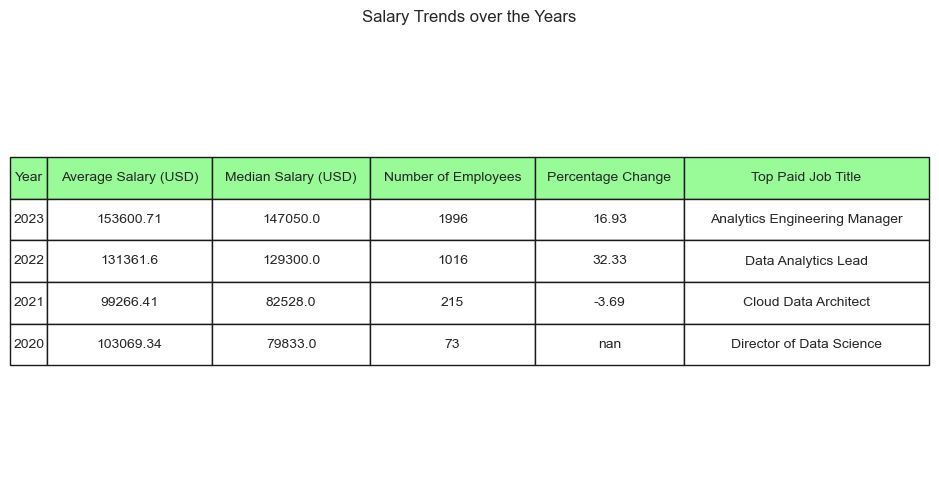

In [62]:
# Calculate the average salary for each year
average_salary_by_year = df.groupby(df['Year'].dt.year)['Salary in USD'].mean().reset_index()
average_salary_by_year.columns = ['Year', 'Average Salary (USD)']
average_salary_by_year['Average Salary (USD)'] = average_salary_by_year['Average Salary (USD)'].round(2)

# Calculate the median salary for each year
median_salary_by_year = df.groupby(df['Year'].dt.year)['Salary in USD'].median().reset_index()
median_salary_by_year.columns = ['Year', 'Median Salary (USD)']
median_salary_by_year['Median Salary (USD)'] = median_salary_by_year['Median Salary (USD)'].round(2)

# Calculate the number of employees for each year
num_employees_by_year = df.groupby(df['Year'].dt.year).size().reset_index()
num_employees_by_year.columns = ['Year', 'Number of Employees']

# Merge all data into a single DataFrame
salary_trends_table = average_salary_by_year.merge(median_salary_by_year, on='Year')
salary_trends_table = salary_trends_table.merge(num_employees_by_year, on='Year')

# Calculate the percentage change in average salary compared to the previous year
salary_trends_table['Percentage Change'] = salary_trends_table['Average Salary (USD)'].pct_change() * 100
salary_trends_table['Percentage Change'] = salary_trends_table['Percentage Change'].round(2)

# Calculate the top-paid job title for each year
top_job_titles_by_year = df.groupby([df['Year'].dt.year, 'Job Title'])['Salary in USD'].mean().reset_index()
top_job_titles_by_year = top_job_titles_by_year.loc[top_job_titles_by_year.groupby('Year')['Salary in USD'].idxmax()]

# Merge the top job titles into the main table
salary_trends_table = salary_trends_table.merge(top_job_titles_by_year[['Year', 'Job Title']], on='Year')
salary_trends_table = salary_trends_table.rename(columns={'Job Title': 'Top Paid Job Title'})

# Sort the table by year in descending order
salary_trends_table = salary_trends_table.sort_values(by='Year', ascending=False)

# Create a subplot to plot the table
fig, ax = plt.subplots(figsize=(10, 6))

# Hide axes
ax.axis('off')

# Plot the table
table_data = salary_trends_table.values.tolist()
table_headers = salary_trends_table.columns.tolist()
table = ax.table(cellText=table_data, colLabels=table_headers, cellLoc='center', loc='center', colColours=['palegreen'] * len(table_headers))
table.auto_set_font_size(False)
table.set_fontsize(10)

table.scale(1.9, 2.5)
table.auto_set_column_width([0, 1, 2, 3, 4])

plt.title('Salary Trends over the Years')
plt.show()

#### Salary Trends By Country

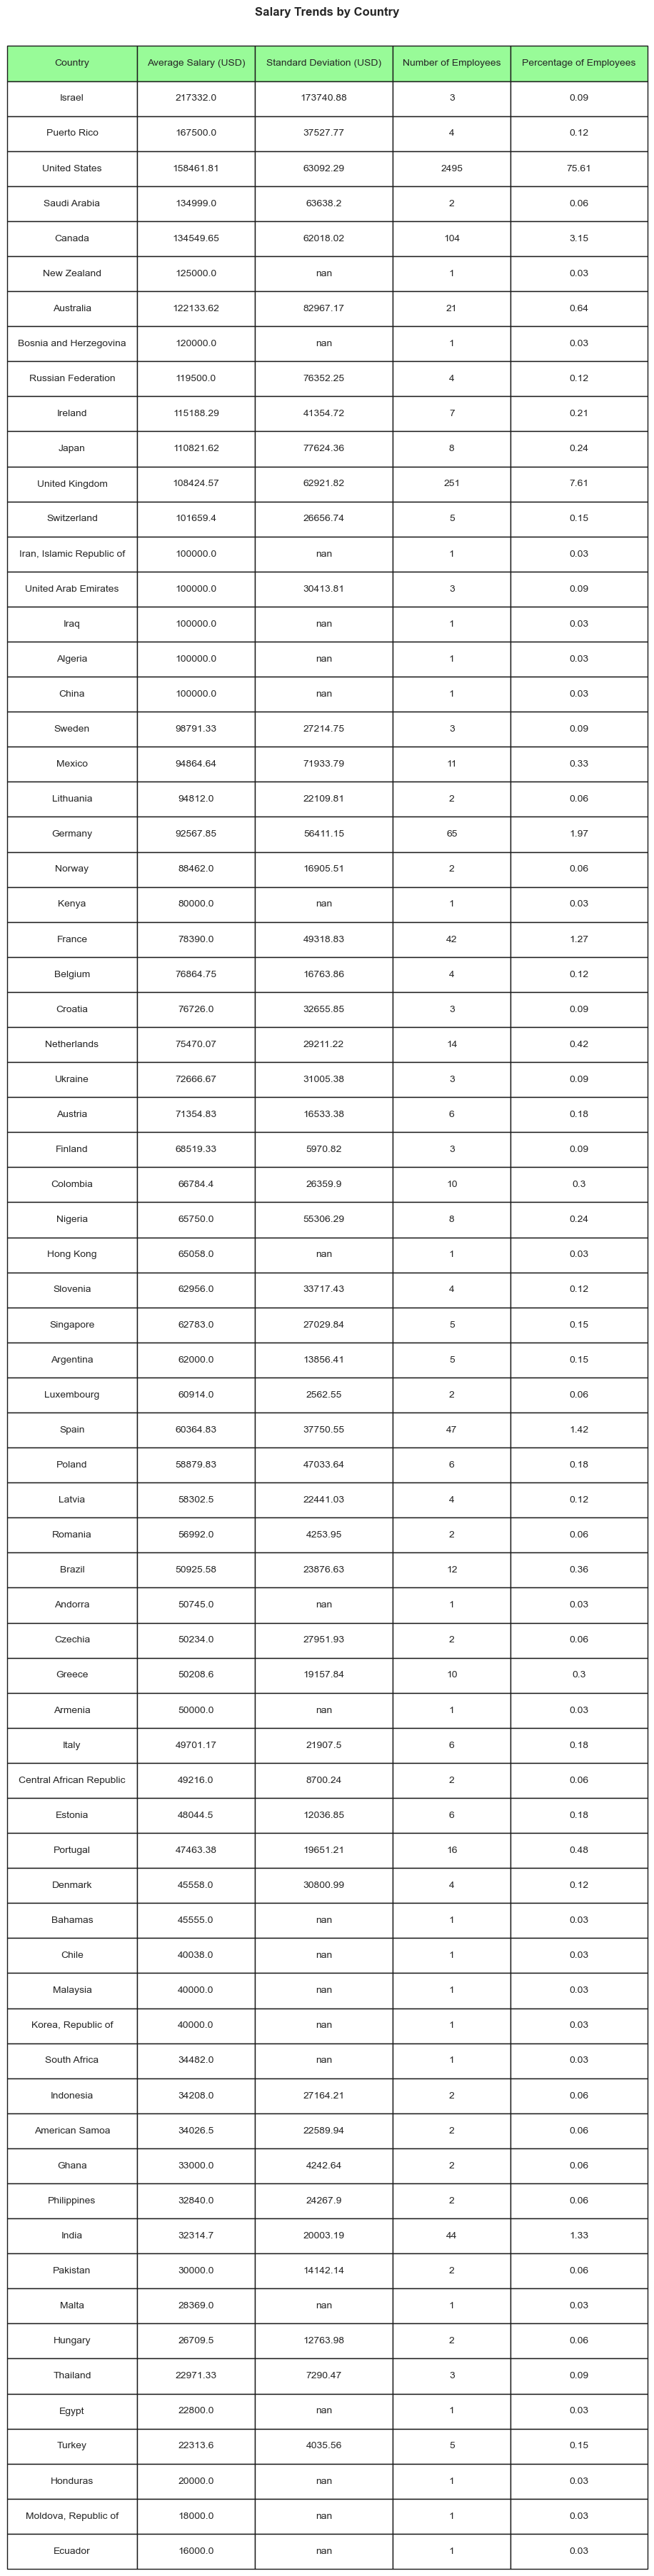

In [63]:

# Group the data by country (using 'Company Location' column)
grouped_by_country = df.groupby('Company Location')

# Calculate the average salary for each country
average_salary_by_country = grouped_by_country['Salary in USD'].mean().reset_index()
average_salary_by_country.columns = ['Country', 'Average Salary (USD)']
average_salary_by_country['Average Salary (USD)'] = average_salary_by_country['Average Salary (USD)'].round(2)

# Calculate the standard deviation of salaries for each country
std_dev_by_country = grouped_by_country['Salary in USD'].std().reset_index()
std_dev_by_country.columns = ['Country', 'Standard Deviation (USD)']
std_dev_by_country['Standard Deviation (USD)'] = std_dev_by_country['Standard Deviation (USD)'].round(2)

# Calculate the number of employees for each country
num_employees_by_country = grouped_by_country.size().reset_index()
num_employees_by_country.columns = ['Country', 'Number of Employees']

# Calculate the percentage of employees for each country
total_employees = num_employees_by_country['Number of Employees'].sum()
num_employees_by_country['Percentage of Employees'] = (num_employees_by_country['Number of Employees'] / total_employees) * 100
num_employees_by_country['Percentage of Employees'] = num_employees_by_country['Percentage of Employees'].round(2)

# Merge all data into a single DataFrame
salary_trends_by_country = average_salary_by_country.merge(std_dev_by_country, on='Country')
salary_trends_by_country = salary_trends_by_country.merge(num_employees_by_country, on='Country')

# Sort the table by average salary in descending order
salary_trends_by_country = salary_trends_by_country.sort_values(by='Average Salary (USD)', ascending=False)

# Create a subplot to plot the table
fig, ax = plt.subplots(figsize=(10, 6))

# Hide axes
ax.axis('off')

# Plot the table
table_data = salary_trends_by_country.values.tolist()
table_headers = salary_trends_by_country.columns.tolist()
table = ax.table(cellText=table_data, colLabels=table_headers, cellLoc='center', loc='center', colColours=['palegreen'] * len(table_headers))
table.auto_set_font_size(False)
table.set_fontsize(10)

# Adjust table size and cell padding
table.scale(1.2, 1.2)
table.auto_set_column_width([0, 1, 2, 3, 4])

# Add the title above the table
ax.text(0.5, 2.1, 'Salary Trends by Country', fontsize=12, ha='center', va='center', fontweight='bold', transform=ax.transAxes)

plt.subplots_adjust(top=2)

plt.show()


# Data Visualization

- In this section I will be using several data visualizations in order to explore the following:

- **Salary Variation by Country**

- **Salary by Job Title**

- **Salary by Experience Level**

#### Salary Distribution

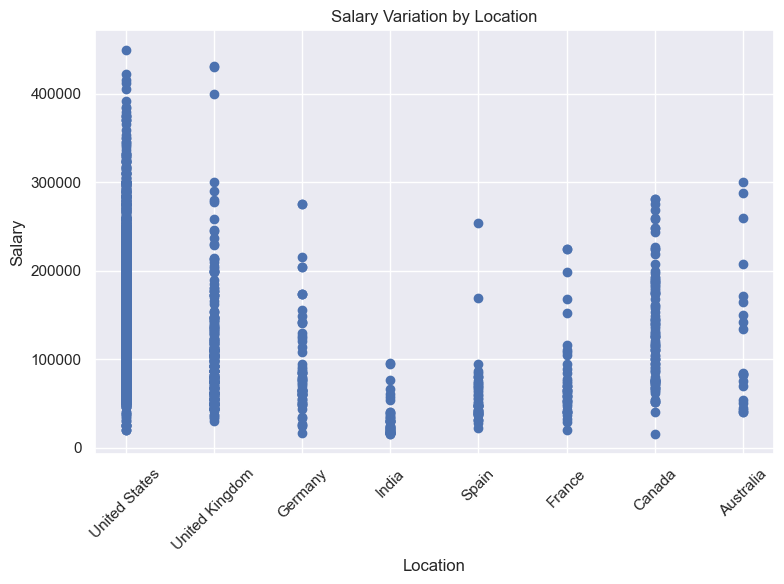

In [64]:
countries_count = df['Company Location'].value_counts()
filtered_locations = countries_count[countries_count > 20].index
filtered_df = df[df['Company Location'].isin(filtered_locations)]
plt.figure(figsize=(8, 6))  # Set the size of the chart

plt.scatter(filtered_df['Company Location'], filtered_df['Salary in USD'])

# Add labels and title to the chart
plt.xlabel('Location')
plt.ylabel('Salary')
plt.title('Salary Variation by Location')

# Display the chart
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

#### Salary by Job Title

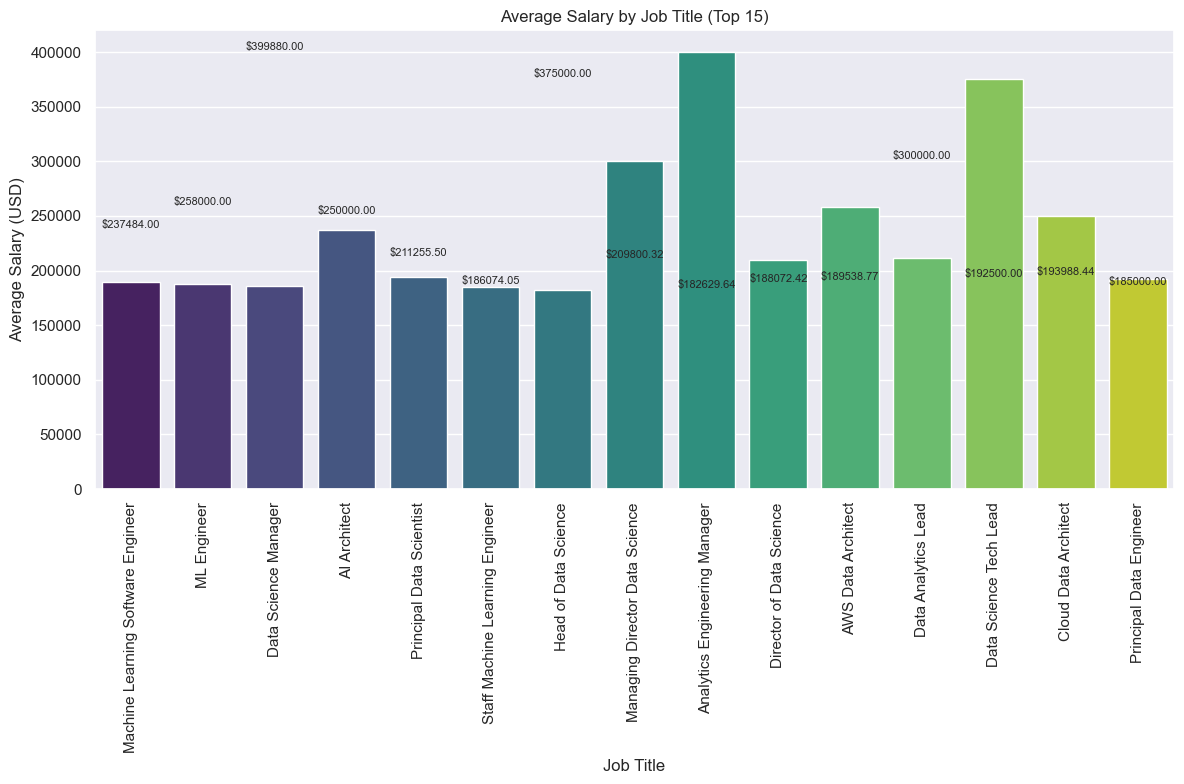

In [65]:
plt.figure(figsize=(12, 8))

# Show only the top 15 job titles with the highest average salaries
top_n = 15
top_jobs = df.groupby('Job Title')['Salary in USD'].mean().nlargest(top_n).index
df_top_jobs = df[df['Job Title'].isin(top_jobs)]

sns.barplot(x='Job Title', y='Salary in USD', data=df_top_jobs, ci=None, palette='viridis')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Job Title (Top 15)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add value labels on top of each bar
for index, value in enumerate(df_top_jobs.groupby('Job Title')['Salary in USD'].mean()):
    plt.text(index, value, f"${value:.2f}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()



**Salary by Experience Level**

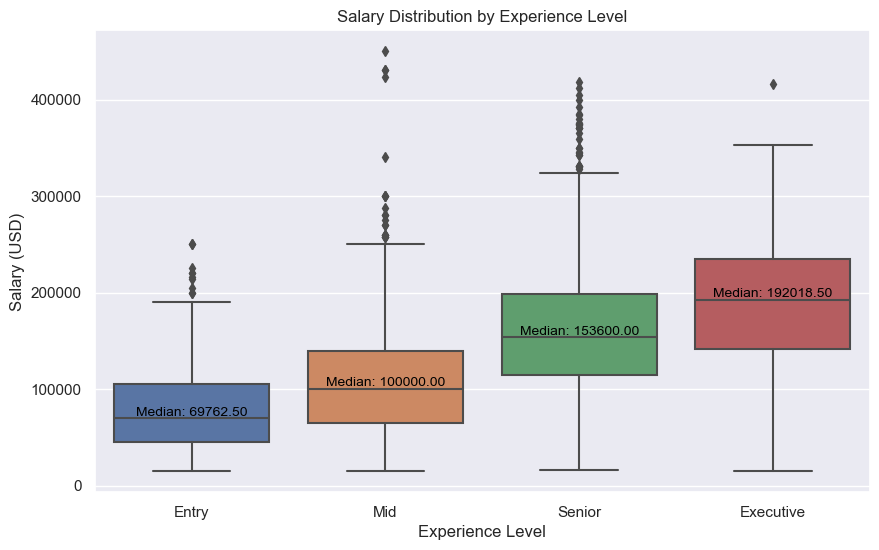

In [66]:
# Define the desired order for Experience Level on the x-axis
desired_order = ['Entry', 'Mid', 'Senior', 'Executive']

# Create the box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Experience Level', y='Salary in USD', data=df, order=desired_order, showfliers=True)

# Set x-axis order explicitly
plt.xticks(range(len(desired_order)), desired_order)

plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.title('Salary Distribution by Experience Level')

# Add median annotations to the plot
for i, exp_level in enumerate(desired_order):
    median_val = df[df['Experience Level'] == exp_level]['Salary in USD'].median()

    ax.text(i, median_val, f"Median: {median_val:.2f}", ha='center', va='bottom', color='black', fontsize=10)
plt.show()

# Salary Analysis

In this section I will create a new dataframe that only includes U.S based full time salary data. After creating this filtered data frame I will create several 90% confidence intervals to further explore data science salary trends in the U.S

### Cleaning the Data

In [67]:
#Creating df that only includes full time positions based in the U.S
filtered_df = df[(df['Employment Type'] == 'Full-Time') & (df['Company Location'] == 'United States')].copy()

# List of columns to keep in the filtered_df DataFrame
desired_columns = ['Experience Level', 'Expertise Level', 'Salary in USD', 'Year', 'Company Size']

# Drop all other columns
filtered_df = filtered_df[desired_columns].copy()

# Removing the day and month placeholders in the year column
filtered_df['Year'] = filtered_df['Year'].dt.year

### Examining Filtered Data Frame

In [68]:
filtered_df

,Experience Level,Expertise Level,Salary in USD,Year,Company Size
0,Senior,Expert,210000,2023,Medium
1,Senior,Expert,165000,2023,Medium
2,Senior,Expert,185900,2023,Medium
3,Senior,Expert,129300,2023,Medium
4,Senior,Expert,140000,2023,Medium
...,...,...,...,...,...
3292,Mid,Intermediate,423000,2021,Large
3294,Senior,Expert,165000,2021,Large
3295,Senior,Expert,412000,2020,Large
3296,Mid,Intermediate,151000,2021,Large


In [69]:
# Looking at Salary Statistics for the filtered data frame
salary_stats = filtered_df['Salary in USD'].describe()
print(salary_stats)

count      2475.00000
mean     158829.36000
std       62514.68679
min       20000.00000
25%      115000.00000
50%      150000.00000
75%      197465.00000
max      450000.00000
Name: Salary in USD, dtype: float64


In [70]:
experience_counts = filtered_df['Experience Level'].value_counts()
expertise_counts = filtered_df['Expertise Level'].value_counts()

experience_avg_salary = filtered_df.groupby('Experience Level')['Salary in USD'].mean()
expertise_avg_salary = filtered_df.groupby('Expertise Level')['Salary in USD'].mean()

print("Experience Level Counts:")
print(experience_counts)

print("\nExpertise Level Counts:")
print(expertise_counts)

print("\nAverage Salary by Experience Level:")
print(experience_avg_salary)

print("\nAverage Salary by Expertise Level:")
print(expertise_avg_salary)

Experience Level Counts:
Experience Level
Senior       1742
Mid           454
Entry         160
Executive     119
Name: count, dtype: int64

Expertise Level Counts:
Expertise Level
Expert          1742
Intermediate     454
Junior           160
Director         119
Name: count, dtype: int64

Average Salary by Experience Level:
Experience Level
Entry        101542.606250
Executive    202340.109244
Mid          132891.237885
Senior       167878.733639
Name: Salary in USD, dtype: float64

Average Salary by Expertise Level:
Expertise Level
Director        202340.109244
Expert          167878.733639
Intermediate    132891.237885
Junior          101542.606250
Name: Salary in USD, dtype: float64


### Creating The Confidence Intervals

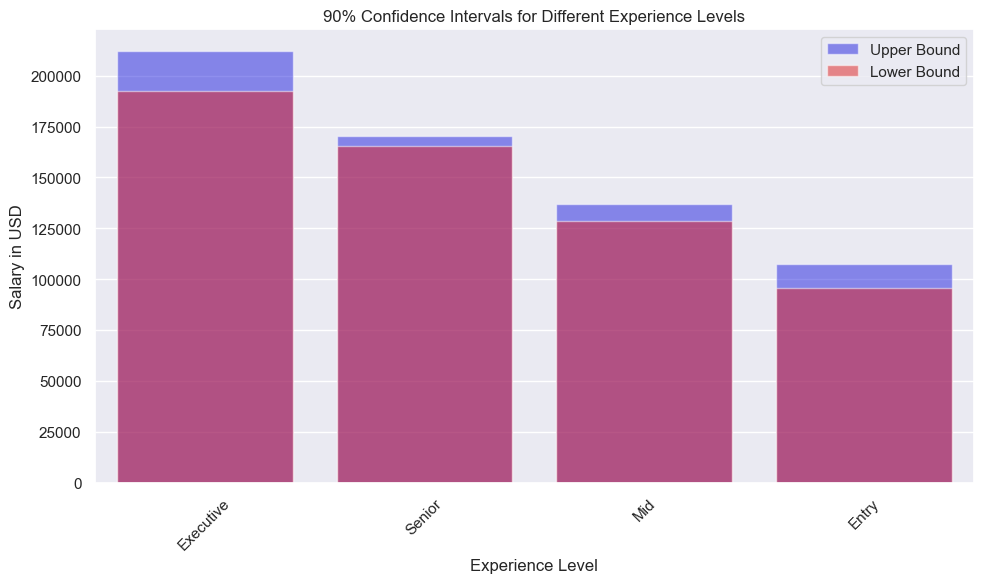

In [71]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary to store the confidence intervals for each experience level
confidence_intervals = {}

# List of experience levels
experience_levels = ['Senior', 'Mid', 'Entry', 'Executive']

# Loop through each experience level and compute the confidence interval
for level in experience_levels:
    salary_data = filtered_df[filtered_df['Experience Level'] == level]['Salary in USD']
    n = len(salary_data)
    mean = np.mean(salary_data)
    std_error = stats.sem(salary_data)
    margin_error = std_error * stats.t.ppf((1 + 0.9) / 2, n - 1)
    lower_bound = mean - margin_error
    upper_bound = mean + margin_error
    confidence_intervals[level] = (lower_bound, upper_bound)

# Visualize the confidence intervals using a bar plot
confidence_df = pd.DataFrame(confidence_intervals).T
confidence_df.columns = ['Lower Bound', 'Upper Bound']
confidence_df.sort_values(by='Lower Bound', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=confidence_df.index, y='Upper Bound', data=confidence_df, color='blue', alpha=0.5, label='Upper Bound')
sns.barplot(x=confidence_df.index, y='Lower Bound', data=confidence_df, color='red', alpha=0.5, label='Lower Bound')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('90% Confidence Intervals for Different Experience Levels')
plt.xticks(rotation=45)

# Adding the legend
plt.legend()

plt.tight_layout()
plt.show()
